In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-data-analytics-certification-kr-2024-2/sample_submission.csv
/kaggle/input/big-data-analytics-certification-kr-2024-2/train.csv
/kaggle/input/big-data-analytics-certification-kr-2024-2/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
train = pd.read_csv('/kaggle/input/big-data-analytics-certification-kr-2024-2/train.csv')
test = pd.read_csv('/kaggle/input/big-data-analytics-certification-kr-2024-2/test.csv')

In [4]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [6]:
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

Fraudulent transactions are overwhelmingly rare.

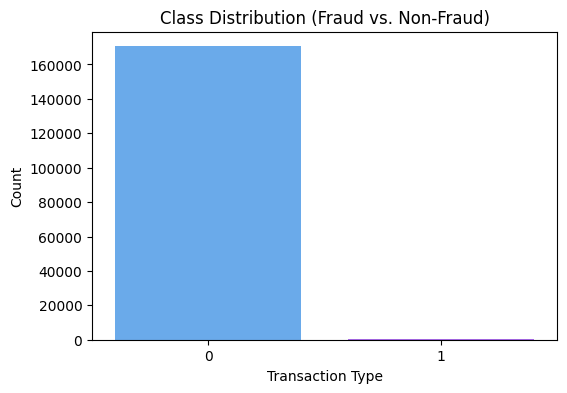

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=train, palette='cool')
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

Since I assumed that there might be a difference in transaction amounts between fraudulent and normal transactions, I created the following graph.

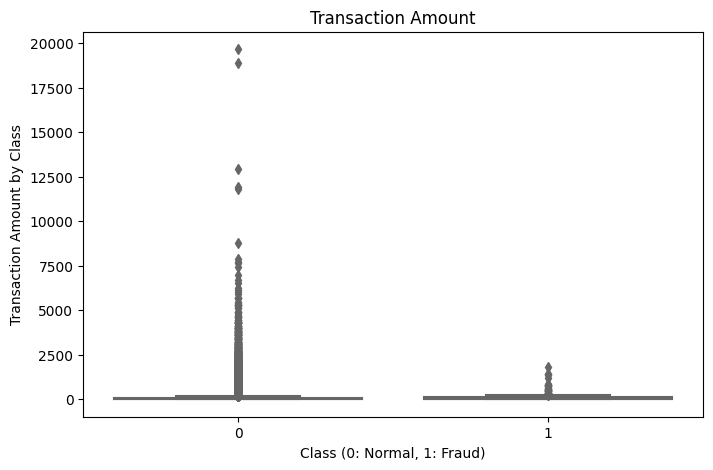

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=train, palette='cool')
plt.title('Transaction Amount')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Transaction Amount by Class')
plt.show()

In [10]:
X = train.drop(['Class'], axis=1)
y = train['Class']

In [11]:
#Data Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#oversampling
smote = SMOTE(sampling_strategy=0.01, random_state=42)                                                    
X_train_re , y_train_re = smote.fit_resample(X_train,y_train)
# weight adjustment
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    random_state=0,
    class_weight='balanced',
    max_depth=3
)
rf_model.fit(X_train_re, y_train_re)
y_pred = rf_model.predict(X_test)

In [13]:
print(classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9997    0.9975    0.9986     34105
           1     0.4286    0.8750    0.5753        72

    accuracy                         0.9973     34177
   macro avg     0.7142    0.9363    0.7870     34177
weighted avg     0.9985    0.9973    0.9977     34177



In [14]:
pred = rf_model.predict(test)
pred = (pred > 0.5).astype(int)
sumbit = pd.DataFrame({'id':test['id'],'Class':pred})
sumbit.to_csv('result.csv',index=False)
pd.read_csv('result.csv')

,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0
...,...,...
113918,284801,0
113919,284802,0
113920,284803,0
113921,284804,0
